# Numeric Python

## introduction

Python was initially designed in the late 80s to be easy and intuitive, suitable for everyday tasks (quoting former BDFL Guido van Rossum).
It then become very popular for text processing, web development, and as a fast scripting glue language.

However, due to its interpreted nature, it was not adequate for computationnally intensive tasks.

In the early 2000s, a library *Numeric* quickly renamed as *numpy* implemented wrappers for low level linear algebra operations BLAS (>1979!) and LAPACK (>1990). It uses Python object system to make it transparent to the user.
This made it efficient to perform vectorized operations and provided the foundation of a matlab-like environment, which was later complemented by many scientific
routines, packaged as the scipy library.

Recently, Python introduced special operator `@` aimed to facilitate the development of scientific code.




## numpy

Numpy implements an array object, called ndarray. It is a container for homogenous data.

(remark: there used to be a distinction between 2d arrays and matrices, with different default multiplication operator)


### array definition

In [1]:
import numpy as np

In [2]:
# create an empty array
np.empty(10)

array([6.93885585e-310, 6.93885731e-310, 6.93885729e-310, 6.93884672e-310,
       6.93884672e-310, 6.93884672e-310, 6.93884701e-310, 6.93884701e-310,
       6.93885330e-310, 6.93885330e-310])

In [5]:
a = np.empty((2,2))
a[...] = 0
a

array([[0., 0.],
       [0., 0.]])

In [6]:
# create an array full of zeros
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [8]:
np.ones((3,))

array([1., 1., 1.])

In [21]:
a = np.ones((3,3))

In [11]:
np.ones((3,43,3,4));

In [9]:
# modify values 

In [22]:
a[0,2] = 2
a

array([[1., 1., 2.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [23]:
b = a.copy()

In [24]:
b[2, 1] = 3
b

array([[1., 1., 2.],
       [1., 1., 1.],
       [1., 3., 1.]])

In [25]:
a

array([[1., 1., 2.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [26]:
# create an array from a python list

np.array([0.1, 0.2, 0.3])

array([0.1, 0.2, 0.3])

In [28]:
# from iterators
np.array(range(9) )

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [30]:
# from a list of lists
np.array( [[1,2],
           [3,4]])

array([[1, 2],
       [3, 4]])

In [31]:
# create a range vector
np.arange(9)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [32]:
# create a linearly spaced vector
np.linspace(0,1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [33]:
# create diagonal/identity matrices
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [34]:
np.diag([0.2, 0.3, 0.4])

array([[0.2, 0. , 0. ],
       [0. , 0.3, 0. ],
       [0. , 0. , 0.4]])

In [37]:
# create random matrices
np.random.rand(3,3)

array([[0.41986228, 0.99626249, 0.75782926],
       [0.85174387, 0.78286393, 0.44947954],
       [0.18900114, 0.59268638, 0.20477829]])

### basic operations

In [39]:
# transpose
a.T

array([[1., 1., 1.],
       [1., 1., 1.],
       [2., 1., 1.]])

In [40]:
# addition, substraction
a*0.1 - a

array([[-0.9, -0.9, -1.8],
       [-0.9, -0.9, -0.9],
       [-0.9, -0.9, -0.9]])

In [41]:
# element-wise multiplication (default)
np.array([1,2])*np.array([3,4])

array([3, 8])

In [45]:
a = np.random.rand(2,2,2)
b = np.random.rand(2,2,2)
print(a)
print(b)

[[[0.9114786  0.23034894]
  [0.12840275 0.04084198]]

 [[0.85039201 0.41342789]
  [0.30143156 0.80700253]]]
[[[0.71583109 0.50125602]
  [0.3198523  0.14797821]]

 [[0.53420941 0.97116213]
  [0.3497075  0.26373715]]]


In [46]:
a*b

array([[[0.65246472, 0.11546379],
        [0.04106992, 0.00604372]],

       [[0.45428741, 0.40150551],
        [0.10541288, 0.21283655]]])

In [ ]:
# matrix multiplication

In [47]:
a = np.eye(2) *2
a

array([[2., 0.],
       [0., 2.]])

In [51]:
b = np.random.rand(2,2)
b

array([[0.33146072, 0.95925823],
       [0.63756806, 0.47443894]])

In [52]:
a@b

array([[0.66292144, 1.91851645],
       [1.27513612, 0.94887789]])

In [53]:
np.array([1,2])@np.array([3,4])

11

In [ ]:
# matlab
a * b # matrix multiplication
a .* b

### indexing

In [54]:
# extract one element
a = np.random.rand(3,4)
a

array([[0.92400817, 0.31234771, 0.65854188, 0.76836415],
       [0.81349317, 0.35399854, 0.06728975, 0.20855232],
       [0.28225551, 0.15737295, 0.45250934, 0.10510415]])

In [55]:
a[1, 3]

0.20855231621199832

In [56]:
# extract a slice
a[0, 0:2]

array([0.92400817, 0.31234771])

In [58]:
# multidimensional slicing
a[1:3, 0:2]

array([[0.81349317, 0.35399854],
       [0.28225551, 0.15737295]])

In [60]:
# boolean indexing
a[a<0.5]

array([0.31234771, 0.35399854, 0.06728975, 0.20855232, 0.28225551,
       0.15737295, 0.45250934, 0.10510415])

In [62]:
# ellipsis (inplace operations)
a[...] = 0.2

In [63]:
a

array([[0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2]])

### casting and broadcasting

Operations are defined for arrays that have the exact same size. 
However, when arrays have the same number of dimensions, a dimension of length of length $1$ is implicitly casted to a dimension of length $N$. When an array is missing dimensions, dimension of length are added at the beginning

In [97]:
# examples

a = np.array([[1,2,3],[4,5,6]]) # 2x2 matrix
v = np.array([0.1,0.2,0.3]).reshape((1,3))
a + v

array([[1.1, 2.2, 3.3],
       [4.1, 5.2, 6.3]])

In [ ]:
# this works too
a = np.array([[1,2,3],[4,5,6]]) # 2x2 matrix
v = np.array([0.1,0.2,0.3])
a + v

In [98]:
# this doesn't
a = np.array([[1,2,3],[4,5,6]]) # 2x2 matrix
v = np.array([0.1,0.2])
a + v

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

New empty dimensions can be added by indexing by None. I recommend to always do it.

In [100]:
a = np.array([[1,2,3],[4,5,6]]) # 2x2 matrix
v = np.array([0.1,0.2])
a+v[:,None]

array([[1.1, 2.1, 3.1],
       [4.2, 5.2, 6.2]])

### data types

While matlab is *double* centric, numpy creates *float64* arrays by default, but can handle any other precision just as well.

In [65]:
# float values (8 bits, 16, ...)
a = np.array([0.1, 0.2])
a.dtype

dtype('float64')

In [72]:
a = np.array([0.1, 0.2], dtype='float16')
a.dtype

dtype('float16')

In [73]:
# int values
a = np.array([2, 3,4], dtype='int8')


In [75]:
# str values (str length)
np.array(['a','to be or not to be'])

array(['a', 'to be or not to be'], dtype='<U18')

In [27]:
# object (don't do that)

### (advanced) data ordering

There are two main ways to store multidimensional data:

![ordering](column_order.svg)

Default ordering of data with numpy is row-major (aka as last index varies first).


In [78]:
a = np.arange(6).reshape((2,3))
print(a)
a.flags

[[0 1 2]
 [3 4 5]]


  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

Numpy can also deal with arrays in Fortran order.

In [80]:
a = np.arange(6).reshape((2,3), order='F')
print(a)
print()
print(a.flags)

[[0 2 4]
 [1 3 5]]

  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False


Usually arrays in non-`C` order are obtained as the result of an operation, like transposition, or slicing.

In [64]:
a = np.array([
        [1,2,3],
        [4,5,6]
    ])
print(a.T)
print(a.T.flags)


[[1 4]
 [2 5]
 [3 6]]
  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False


In [65]:
b = np.random.random((3,3,3))
b.swapaxes(2,1).flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [70]:
c = np.random.random((5,5))
c[2:4,2:4]
c[2:4,2:4].flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

The result of most operations doesn't depend on underlying ordering, but it is an important factor performance-wise: it is faster to access contiguous data.

In all cases, it is possible to get a new contiguous array, with the copy() method.
Not that in this case, the data is not shared anymore with the initial array.

In [71]:
c[2:4,2:4].copy().flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

### Differences between numpy's arrays and matlab:

- numpy has 0, 1, 2, 3, ... dimensional arrays while matlab treats scalars and vectors as degenerate 2d matrices
- default data order is row-major (like C), while matlab is column-major (like Fortran)
- indexing is zero-based conistent with python's conventions
- all dimensions are treated symmetrically for instance `a[:,:,0]` and `a[:,0,:]` are both vectors (in matlab, the last dimension is not suppressed without calling squeeze)
- many operations in numpy return views instead of copies
- broadcasting is very powerful and consistent


### Other subpackages

The basic object of numpy is the nd-array. It contains many other submodules.

In [79]:
# math functions work are optimized for vectorized evaluation
# sin, cos, log, abs, ...

a = np.linspace(0,1,100000)
%time np.sin(a)

CPU times: user 12.9 ms, sys: 0 ns, total: 12.9 ms
Wall time: 12.6 ms


array([0.00000000e+00, 1.00001000e-05, 2.00002000e-05, ...,
       8.41460178e-01, 8.41465582e-01, 8.41470985e-01])

In [84]:
# linalg: linear algebra
import numpy.linalg
a =np.random.rand(2,2)
b =np.random.rand(2)

In [86]:
numpy.linalg.solve(a,b) # solves ax=b

array([0.58639228, 0.34804268])

In [106]:
# polynomials


In [107]:
# ...

## scipy

Scipy's library leverages numpy to provide many other functions:
- optimization
- integration
- interpolation
- sparse matrices
- more linear algebra

## matplotlib

### matlab-like interface

In [87]:
from matplotlib import pyplot as plt

In [94]:
x = np.linspace(0,1,5)

In [95]:
y = np.sin(x*5)

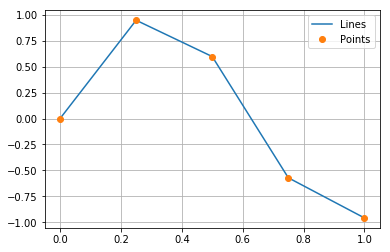

In [102]:
plt.plot(x,y, label='Lines')
plt.plot(x,y,'o', label='Points')
plt.grid()
plt.legend(loc='upper right')
plt.savefig("fig.png")

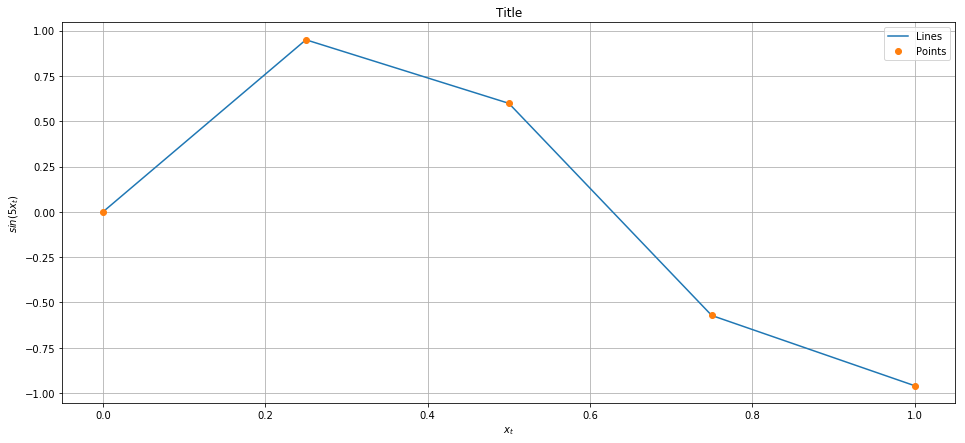

In [107]:
plt.figure(figsize=(16, 7))
plt.plot(x,y, label='Lines')
plt.plot(x,y,'o', label='Points')
plt.grid()
plt.title("Title")
plt.xlabel("$x_t$")
plt.ylabel("$sin(5 x_t)$")
plt.legend(loc='upper right')
plt.savefig("fig.pdf")

### other plotting options

- seaborn (customized matplotlib to plot distributions)
- ipympl (interactive matplotlib)
- bqplot (full jupyterlab integration with matplotlib and gg interface)
- plotly (interactive, share plots online)

### grammar of graphics approach

- ggplot
- altair (based on vega-lite)


## performance optimization (if time)

Numpy encourages you to write using vectorized computations. This is because interpreted code is slow (one avoids loops). However, it is also possible to compile python code using numba which limits the interpretation overhead and memory footprint.